# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [104]:
# Import libraries

from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import poisson
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [3]:
# Problem info
fruits = 100
apple = 60
orange = 40

# Probability of taking each fruit
p_a = apple / fruits
p_o = orange / fruits

# Print results
print(f'Probability of taking an apple: {p_a}')
print(f'Probability of taking an orange: {p_o}')

Probability of taking an apple: 0.6
Probability of taking an orange: 0.4


In [96]:
# Initialize the distribution for apples and oranges
fruits_bernoulli = bernoulli(p_a)

# Taking a sample of 100 observations of my distribution.
sample = fruits_bernoulli.rvs(size=100)

# Print number of apples and oranges in my sample:
print(f'Number of apples: {list(sample).count(1)}')
print(f'Number of oranges: {list(sample).count(0)}')

Number of apples: 68
Number of oranges: 32


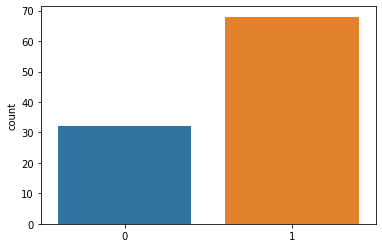

In [103]:
x= sns.countplot(x=sample);

Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [17]:
# 1. What is the probability that the first 5 fruits are all apples?
p_5apples = p_a ** 5
p_5apples_round = round(p_5apples, 3)
print(f'Probability of taking 5 apples first: {p_5apples_round}')

# 2. What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?
p_15oranges = p_o ** 15
p_5apples_15oranges = p_5apples * p_15oranges
p_5apples_15oranges_round = round(p_5apples_15oranges,11)
print(f'Probability of taking 5 apples first and 15 oranges next: {p_5apples_15oranges_round}')


Probability of taking 5 apples first: 0.078
Probability of taking 5 apples first and 15 oranges next: 8.349e-08


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

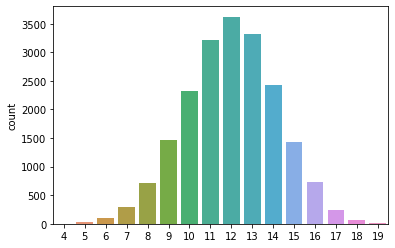

In [114]:
# Setting new sample, using probability from above.
N = 20
p = p_a

# Initialize binomial distribution
fruits_binom = binom(N,p)

# Taking a sample of 20_000 observations.
sampleb = fruits_binom.rvs(size=20000)
sns.countplot(x = sampleb);

In [141]:
# Probability mass function (pmf) for having 5 apples
p_5a_15o = round(fruits_binom.pmf(5),3)
print(f'Probability of having 5 apples and 15 oranges: {p_5a_15o}')

Probability of having 5 apples and 15 oranges: 0.001


In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [136]:
# Cumulative distribution function (cdf) for having les than 5 apples
print('The probability of having less than 5 apples is: ',round(fruits_binom.cdf(5),3))

The probability of having less than 5 apples is:  0.002


**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

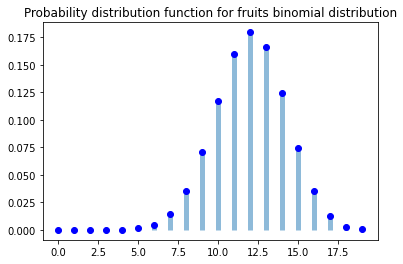

In [143]:
# Setting chart parameters
x = np.arange(0,N)
fig, ax = plt.subplots(1,1);

# Plotting probability mass function points for 0 to 20 fruits being 1 apple and 0 orange.
ax.plot(x, fruits_binom.pmf(x), 'bo');

# Drawing lines to visualize better the plot
ax.vlines(x, 0, fruits_binom.pmf(x), lw=5, alpha = 0.5);

# Setting the title for the plot
plt.title('Probability distribution function for fruits binomial distribution');


## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [62]:
# Initializate my poisson distribution with the info above.
goals_poisson = poisson (mu = 2.3 )

# Drawing a sample with .rvs with 1_000 observations.
sample = goals_poisson.rvs(size=1000)

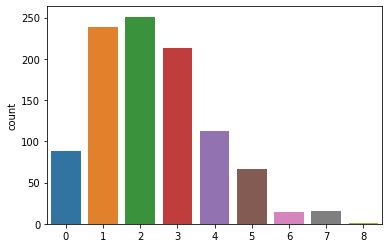

In [60]:
# Checking the results with a countplot
sns.countplot(x= sample);

In [63]:
# Using .pmf(5) or probability mass function of 5 to see the probability of that event happening.
print('The probability of 5 goals scored is: ', round(goals_poisson.pmf(5),3))

# Otherwise, if we were to check the probability of having below 5 goals, we use .cdf(5) or cumulative distribution function of 5.
print('The probability of having less than 5 goals: ', round(goals_poisson.cdf(5),3))


The probability of 5 goals scored is:  0.054
The probability of having less than 5 goals:  0.97


**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

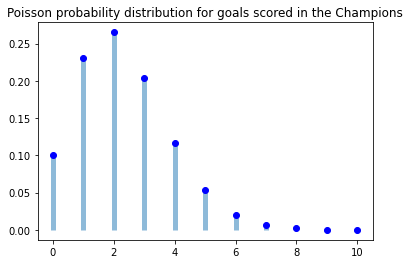

In [66]:
# Setting the chart
x = np.arange(0,11)
fig, ax = plt.subplots(1,1);

# Plotting probability mass function points for 0 to 10 goals scored.
ax.plot(x, goals_poisson.pmf(x), 'bo');

# Drawing lines to visualize better the plot
ax.vlines(x, 0, goals_poisson.pmf(x), lw=5, alpha = 0.5);

# Setting the title for the plot
plt.title('Poisson probability distribution for goals scored in the Champions');